# The Solow Model in Python

By the end of this lecture you will be able to:
1. Implement the basic Solow model in Python.
2. Compute the steady state values analytically and numerically.
3. Plot the steady-state diagram (investment vs. break-even line) and mark the steady state.
4. Simulate transitional dynamics for different initial conditions and parameter values.
5. Perform comparative statics (e.g., change in savings, depreciation).
6. Compute Golden Rule capital and relate it to consumption maximization.
7. Extend the model to include population and technology growth (in the problem sets).


**Table of contents**<a id='toc0_'></a>    
- 1. [The Standard Solow Model](#toc1_)    
- 2. [Getting Started](#toc2_)    
- 3. [Computing Steady States](#toc3_)    
- 4. [The Steady State Diagram](#toc4_)    
- 5. [Savings Rates](#toc5_)    
  - 5.1. [Transitional dynamics & temporary savings shock](#toc5_1_)    
  - 5.2. [Comparative statics: A Permanent Increase in the savings rate](#toc5_2_)    
- 6. [Setting up a Model Simulator](#toc6_)    
  - 6.1. [Extensions](#toc6_1_)    
- 7. [Takeaways](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[The Standard Solow Model](#toc0_)


For now, we assume $n=0$, $g=0$.

We consider a standard Solow model with Cobb–Douglas production:

$
Y_t = K_t^\alpha L_t^{\,1-\alpha}, \qquad 0<\alpha<1.
$

Define per-worker variables:

$
y_t \equiv \frac{Y_t}{L_t} = f(k_t) = k_t^\alpha,
\qquad \text{where } k_t \equiv \frac{K_t}{L_t}.
$


**Capital accumulation:**

$
K_{t+1} = s\,Y_t + (1-\delta)K_t,
\qquad s\in(0,1),\ \delta\in(0,1).
$


**Per-worker law of motion of capital (for now, we assume no population growth, no technological progress):**

$
\begin{aligned}
k_{t+1}
&= \frac{K_{t+1}}{L_{t+1}}
= \frac{sY_t + (1-\delta)K_t}{L_t} \\
&= s\,y_t + (1-\delta)k_t
= s\,f(k_t) + (1-\delta)k_t.
\end{aligned}
$


**Steady state** $k^*$ satisfies:
\begin{align}
k^* = s f(k^*) + (1-\delta)k^* \quad \Rightarrow \quad s f(k^*) = \delta k^*.
\end{align}
For $f(k)=k^\alpha$,
\begin{align}
k^* = \left(\frac{s}{\delta}\right)^{\frac{1}{1-\alpha}}, \qquad
y^* = (k^*)^\alpha,\qquad
i^* = s y^* = \delta k^*,\qquad
c^* = y^* - i^* = (1-s)y^*.
\end{align}



<a id="toc1_"></a>
## 2. <a id='toc2_'></a>[Getting Started](#toc0_)

First, we import the necessary Python packages. We also set a random seed so that our results can be reproduced consistently (see previous lecture for details).

In [136]:

# Imports
import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility (see previous lecture)
rng = np.random.default_rng(42)



In [137]:

# === Baseline parameters (edit these for experiments) ===
params = {
    'alpha': 0.33,   # capital share
    's':     0.25,   # savings rate
    'delta': 0.06,   # depreciation
}

params

{'alpha': 0.33, 's': 0.25, 'delta': 0.06}

We start by defining functions for the basic Solow model (based on the analytical solutions above).

In [138]:
# === Core functions for the Solow model (per worker) ===

def f(k, alpha):
    return np.power(k, alpha)

def fprime(k, alpha):
    return alpha * np.power(k, alpha-1)

def k_star(alpha, s, delta):
    return np.power(s / delta, 1.0 / (1.0 - alpha))

def solow_step_per_worker(k, alpha, s, delta):
    return s * f(k, alpha) + (1 - delta) * k



<a id="toc2_"></a>
## 3. <a id='toc3_'></a>[Computing Steady States](#toc0_)


Next, we read out the parameters we have assigned abve and apply the functions to compute the corresponding steady state values.

In [139]:
alpha, s, delta = params['alpha'], params['s'], params['delta']

kss = k_star(alpha, s, delta)
yss = f(kss, alpha)
iss = s * yss
css = yss - iss


print(f"k*  = {kss:.4f}")
print(f"y*  = {yss:.4f}")
print(f"i*  = {iss:.4f}")
print(f"c*  = {css:.4f}")
# print(f"k_GR= {kgr:.4f}")

k*  = 8.4151
y*  = 2.0196
i*  = 0.5049
c*  = 1.5147


<a id="toc3_"></a>
## 4. <a id='toc4_'></a>[The Steady State Diagram](#toc0_)

This plot shows **output and investment per worker** $s f(k)$ and the **break-even line** $\delta k$.
The steady state $k^*$ is the intersection of investment per worker and the break-even line.

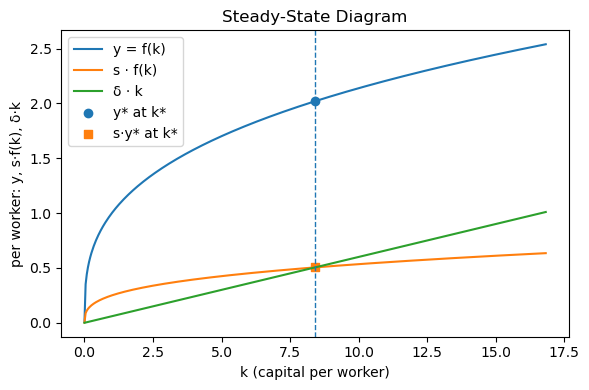

In [140]:
k_grid = np.linspace(1e-6, max(2*kss, 4.0), 400)
output = f(k_grid, alpha)          # y = f(k)
invest = s * output                # s·f(k)
depr   = delta * k_grid            # δ·k

plt.figure(figsize=(6,4))
plt.plot(k_grid, output, label='y = f(k)')
plt.plot(k_grid, invest, label='s · f(k)')
plt.plot(k_grid, depr,   label='δ · k')

# Mark steady state on both y* and s·y*
plt.scatter([kss], [f(kss, alpha)], marker='o', label='y* at k*')
plt.scatter([kss], [s * f(kss, alpha)], marker='s', label='s·y* at k*')

plt.axvline(kss, linestyle='--', linewidth=1)
plt.title('Steady-State Diagram')
plt.xlabel('k (capital per worker)')
plt.ylabel('per worker: y, s·f(k), δ·k')
plt.legend()
plt.tight_layout()
plt.show()


We can use IPython to add widgets and slider on the steady-state diagram. This helps us understand how the steady state changes if parameters vary.

In [141]:
# Steady-state diagram with sliders — single output, fixed x-axis, no duplicates

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as W
from IPython.display import display


# --- fixed x-axis -------------------------------------------------------------
KMAX  = 12.0
NPTS  = 400
k_grid = np.linspace(1e-6, KMAX, NPTS)

# --- widgets ------------------------------------------------------------------
alpha_s = W.FloatSlider(value=1/3, min=0.20, max=0.60, step=0.01, description='α')
s_s     = W.FloatSlider(value=0.20, min=0.001, max=0.40, step=0.01, description='s')
d_s     = W.FloatSlider(value=0.08, min=0.04, max=0.15, step=0.005, description='δ')
showk   = W.Checkbox(value=True, description='Show k* markers')

controls = W.VBox([alpha_s, s_s, d_s, showk])
out = W.Output()

# --- updater: redraws ONE figure inside 'out' each time -----------------------
def update(_=None):
    alpha, s, delta = float(alpha_s.value), float(s_s.value), float(d_s.value)

    y = f(k_grid, alpha)
    invest = s * y
    depr = delta * k_grid

    kss = k_star(alpha, s, delta)
    kss_clip = np.clip(kss, k_grid[0], KMAX)

    with out:
        out.clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(6,4))
        ax.plot(k_grid, y,      label='y = f(k)')
        ax.plot(k_grid, invest, label='s · f(k)')
        ax.plot(k_grid, depr,   label='δ · k')

        if showk.value:
            ax.plot([kss_clip], [f(kss_clip, alpha)],  'o', label='y* at k*')
            ax.plot([kss_clip], [s * f(kss_clip, alpha)], 's', label='s·y* at k*')
            ax.axvline(kss_clip, ls='--', lw=1, color='k')

        ax.set_title('Steady-State Diagram ')
        ax.set_xlabel('k (capital per worker)')
        ax.set_ylabel('per worker: y, s·f(k), δ·k')
        ax.set_xlim(0, KMAX)  # keep x fixed
        ax.set_ylim(0, max(y.max(), invest.max(), depr.max()) * 1.05)
        ax.legend(loc='best')
        plt.tight_layout()
        display(fig)
        plt.close(fig)

# --- wire up & initial draw ---------------------------------------------------
for w in (alpha_s, s_s, d_s, showk):
    w.observe(update, names='value')

update()  # initial render

# --- show a single UI+plot pane, and keep a handle to close on next run ------
_SSPANE = W.VBox([controls, out])
display(_SSPANE)


<a id="toc4_"></a>
## 5. <a id='toc5_'></a>[Savings Rates](#toc0_)

With $n=g=0$ and $f(k)=k^\alpha$,
\begin{align}
k^*(s) = \left(\frac{s}{\delta}\right)^{\frac{1}{1-\alpha}},\quad
y^*(s) = (k^*)^\alpha,\quad
c^*(s) = (1-s)y^*(s).
\end{align}
- Larger $s$ raises $k^*$ and $y^*$, but reduces the fraction of output consumed.
- But what is the optimal savings rate of an economy?


Steady-state **consumption per worker**: $c = f(k) - \delta k$.  
The **Golden Rule** capital $k^{GR}$ maximizes $c(k)$:
\begin{align}
f'(k^{GR})=\delta \quad \Rightarrow \quad
k^{GR} = \left(\frac{\alpha}{\delta}\right)^{\frac{1}{1-\alpha}}, \qquad
s^{GR} = \frac{\delta k^{GR}}{f(k^{GR})} = \alpha.
\end{align}


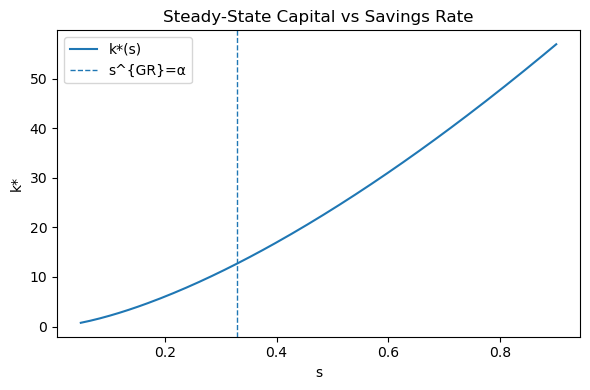

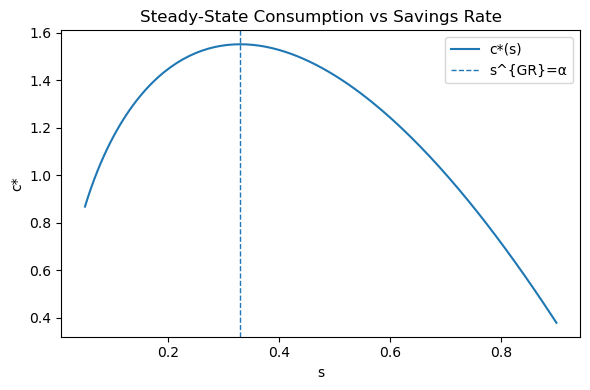

In [142]:
s_values = np.linspace(0.05, 0.9, 150)

kstar_vals = np.power(s_values / delta, 1.0/(1.0 - alpha))
ystar_vals = np.power(kstar_vals, alpha)
## equivalent: use the functions defined earlier
#kstar_vals = k_star(alpha, s_values, delta)
#ystar_vals = f(kstar_vals, alpha)


cstar_vals = (1 - s_values) * ystar_vals

s_gr = alpha  # Golden Rule savings for Cobb–Douglas w/ n=g=0

plt.figure(figsize=(6,4))
plt.plot(s_values, kstar_vals, label='k*(s)')
plt.axvline(s_gr, linestyle='--', linewidth=1, label='s^{GR}=α')
plt.title('Steady-State Capital vs Savings Rate')
plt.xlabel('s')
plt.ylabel('k*')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(s_values, cstar_vals, label='c*(s)')
plt.axvline(s_gr, linestyle='--', linewidth=1, label='s^{GR}=α')
plt.title('Steady-State Consumption vs Savings Rate')
plt.xlabel('s')
plt.ylabel('c*')
plt.legend()
plt.tight_layout()
plt.show()

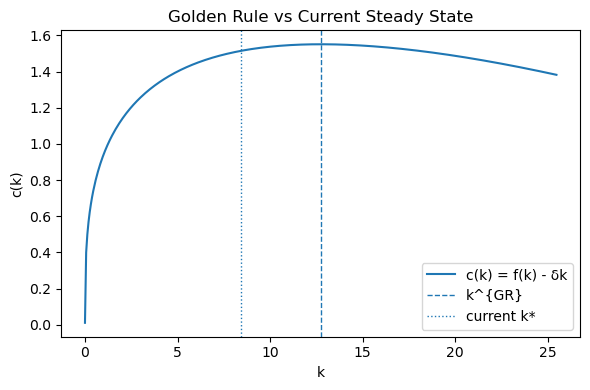

In [143]:
## compute the Golden Rule capital level analytically
# we can add a function for it
def k_golden_rule(alpha, delta):
    return (alpha/delta)**(1/(1-alpha))

kgr = k_golden_rule(alpha, delta)

# span a grid of k values for plotting
k_grid = np.linspace(1e-6, max(2*kgr, 4.0), 400)
# compute consumption per worker along the grid
consumption = f(k_grid, alpha) - delta * k_grid

# Plot consumption function and mark k^GR and current k*
plt.figure(figsize=(6,4))
plt.plot(k_grid, consumption, label='c(k) = f(k) - δk')
plt.axvline(kgr, linestyle='--', linewidth=1, label='k^{GR}')
plt.axvline(kss, linestyle=':', linewidth=1, label='current k*')
plt.title('Golden Rule vs Current Steady State')
plt.xlabel('k')
plt.ylabel('c(k)')
plt.legend()
plt.tight_layout()
plt.show()

<a id="toc1_"></a>
### 5.1. <a id='toc5_1_'></a>[Transitional dynamics & temporary savings shock](#toc0_)


Law of motion (per worker):
\begin{align}
k_{t+1} = s f(k_t) + (1-\delta)k_t.
\end{align}
We simulate (i) convergence from different initial $k_0$ and (ii) a **temporary** drop in $s$ (a savings shock) for a few periods.

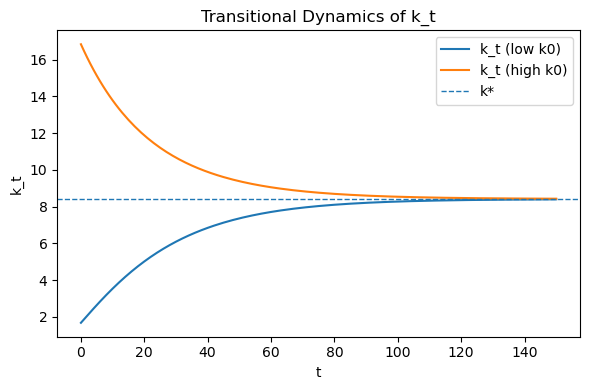

In [144]:
def simulate_path(k0, T, alpha, s, delta):
    k_path = np.empty(T+1) # preallocate arrays
    y_path = np.empty(T+1)
    c_path = np.empty(T+1)
    i_path = np.empty(T+1)
    k_path[0] = k0 # set initial capital value
    y_path[0] = f(k0, alpha)
    i_path[0] = s * y_path[0]
    c_path[0] = y_path[0] - i_path[0]
    for t in range(T):
        k_path[t+1] = s * f(k_path[t], alpha) + (1 - delta) * k_path[t] # we use law of motion for capital
        y_path[t+1] = f(k_path[t+1], alpha)
        i_path[t+1] = s * y_path[t+1]
        c_path[t+1] = y_path[t+1] - i_path[t+1]
    return k_path, y_path, c_path, i_path

T = 150
k0_low  = 0.2 * kss
k0_high = 2.0 * kss
k_low, y_low, c_low, i_low   = simulate_path(k0_low,  T, alpha, s, delta) # low state capital stock
k_high, y_high, c_high, i_hi = simulate_path(k0_high, T, alpha, s, delta) # hight state capital stock

plt.figure(figsize=(6,4))
plt.plot(k_low,  label='k_t (low k0)')
plt.plot(k_high, label='k_t (high k0)')
plt.axhline(kss, linestyle='--', linewidth=1, label='k*')
plt.title('Transitional Dynamics of k_t')
plt.xlabel('t')
plt.ylabel('k_t')
plt.legend()
plt.tight_layout()
plt.show()

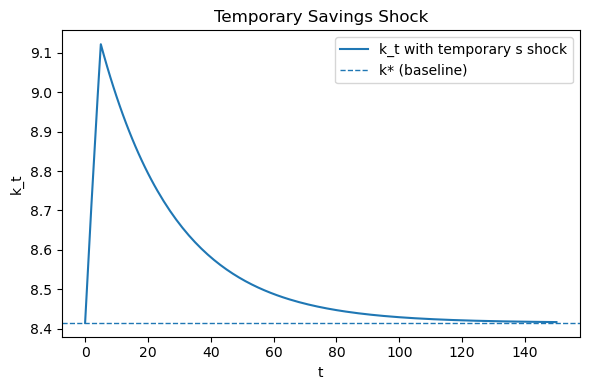

In [145]:
def simulate_temporary_s_shock(k0, T, alpha, s_baseline, s_shock, shock_len, delta):
    k_path = np.empty(T+1) # preallocate arrays
    k_path[0] = k0 # intial capital value
    for t in range(T): 
        s_t = s_shock if t < shock_len else s_baseline
        k_path[t+1] = s_t * f(k_path[t], alpha) + (1 - delta) * k_path[t]
    return k_path

T = 150
shock_len = 5
k0 = kss

# we reduce the savings rate temporarily by 40% (for 1 period = shock_len)
k_path_shock = simulate_temporary_s_shock(k0, T, alpha, s, s*1.3, shock_len, delta)

plt.figure(figsize=(6,4))
plt.plot(k_path_shock, label='k_t with temporary s shock')
plt.axhline(kss, linestyle='--', linewidth=1, label='k* (baseline)')
plt.title('Temporary Savings Shock')
plt.xlabel('t')
plt.ylabel('k_t')
plt.legend()
plt.tight_layout()
plt.show()

<a id="toc1_"></a>
### 5.2. <a id='toc5_2_'></a>[Comparative statics: A Permanent Increase in the savings rate](#toc0_)


Let's change the savings rate $s$ and see how the steady state values of  $k^*$ and $i^*$ move in the diagram. 

Old SS (s0): k*=6.031, i*=0.362
New SS (s1): k*=11.047, i*=0.663


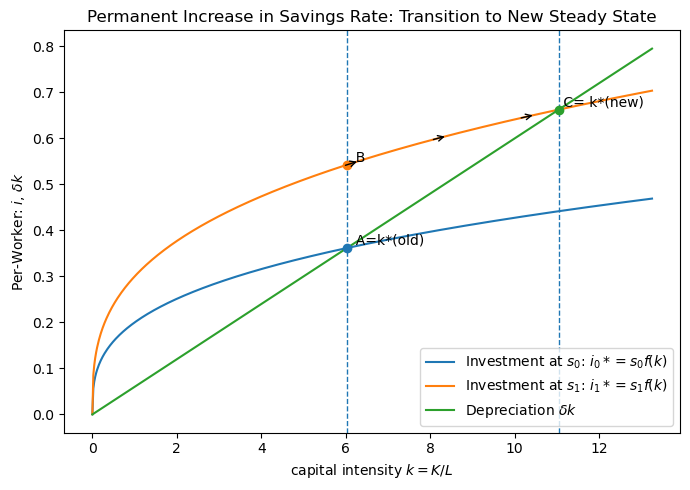

In [146]:
s0    = 0.20          # old savings rate
s1    = 0.30          # new, permanently higher savings rate

# --- old vs new steady states (per worker) ---
k0 = k_star(alpha, s0, delta)
k1 = k_star(alpha, s1, delta)

i0 = delta * k0                      # equals s0 * f(k0,alpha) at SS
i1 = delta * k1                      # equals s1 * f(k1,alpha) at SS
i_at_k0_new_s = s1 * f(k0, alpha)    # jump in investment at old k0

print("Old SS (s0): k*={:.3f}, i*={:.3f}".format(k0, i0))
print("New SS (s1): k*={:.3f}, i*={:.3f}".format(k1, i1))

# --- diagram data ---
k_max = max(1.2*k1, 4.0)
k_grid = np.linspace(1e-8, k_max, 600)

inv_s0 = s0 * f(k_grid, alpha)       # s0·f(k)
inv_s1 = s1 * f(k_grid, alpha)       # s1·f(k)
depr   = delta * k_grid              # δ·k

# --- plot ---
plt.figure(figsize=(7, 5))
plt.plot(k_grid, inv_s0, label=r'Investment at $s_0$: $i_0* = s_0 f(k)$')
plt.plot(k_grid, inv_s1, label=r'Investment at $s_1$: $i_1* =s_1 f(k)$')
plt.plot(k_grid, depr,   label=r'Depreciation $\delta k$', linewidth=1.5)

# Mark key points (no output points)
plt.scatter([k0], [i0], marker='o', zorder=3)                 # old SS on inv/depr
plt.text(k0, i0,  "  A=k*(old)", va='bottom')
plt.scatter([k0], [i_at_k0_new_s], marker='o', zorder=3)      # jump in investment
plt.text(k0, i_at_k0_new_s, "  B", va='bottom')
plt.scatter([k1], [i1], marker='o', zorder=3)                 # NEW SS point
plt.text(k1, i1,  " C= k*(new)", va='bottom')

# vertical lines at k0 and k1
plt.axvline(k0, linestyle='--', linewidth=1)
plt.axvline(k1, linestyle='--', linewidth=1)

# we can add small red arrows along s1·f(k) to indicate transition
for xr in np.linspace(k0*1.05, k1*0.95, 3):
    xL = xr - 0.08*(k1-k0)
    xR = xr
    plt.annotate("", xy=(xR, s1*f(xR, alpha)), xytext=(xL, s1*f(xL, alpha)),
                 arrowprops=dict(arrowstyle="->"))

plt.title('Permanent Increase in Savings Rate: Transition to New Steady State')
plt.xlabel(r'capital intensity $k = K/L$')
plt.ylabel(r'Per-Worker: $i$, $\delta k$')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


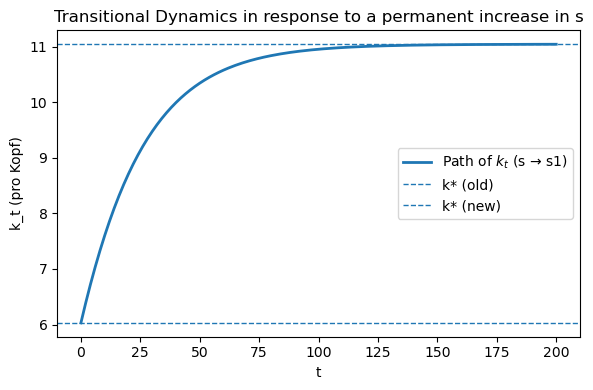

In [147]:
# this defines one step of the transition dynamics
def step(k, alpha, s, delta):
    return s * f(k, alpha) + (1 - delta) * k

T = 200
k_path = np.empty(T + 1); k_path[0] = k0 # preallocate array

# Simulates the transition path under a permanent change in the savings rate to s1, each iteration applies the "step" function
# to move one period forward.
for t in range(T):
    k_path[t+1] = step(k_path[t], alpha, s1, delta)

# Finally, we plot the transition from the old to the new steady state
plt.figure(figsize=(6,4))
plt.plot(k_path, lw=2, label='Path of $k_t$ (s → s1)')
plt.axhline(k0, linestyle='--', linewidth=1, label='k* (old)')
plt.axhline(k1, linestyle='--', linewidth=1, label='k* (new)')
plt.title('Transitional Dynamics in response to a permanent increase in s')
plt.xlabel('t'); plt.ylabel('k_t (pro Kopf)')
plt.legend()
plt.tight_layout()
plt.show()



***Utility: pack/unpack params.***

These helpers make it easier to pass parameter dictionaries around and reuse functions in assignments.

In [148]:
def unpack(p):
    return p['alpha'], p['s'], p['delta']

def steady_states(p):
    alpha, s, delta = unpack(p) # pulls parameter from dict
    kss = k_star(alpha, s, delta) # computes steady-state values
    yss = f(kss, alpha)
    css = yss - delta * kss
    kgr = k_golden_rule(alpha, delta)
    return {'k*': kss, 'y*': yss, 'c*': css, 'kGR': kgr} # returns a dict of steady-state values

print(params)
steady_states(params) # we can now just call this function and we get the steady state values if we pass the params dictionary

{'alpha': 0.33, 's': 0.25, 'delta': 0.06}


{'k*': np.float64(8.415072232654062),
 'y*': np.float64(2.0196173358369744),
 'c*': np.float64(1.5147130018777308),
 'kGR': 12.735586195835264}

## 6. <a id='toc6_'></a>[Setting up a Model Simulator](#toc0_)

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Union

# Define type for flexible input (can be either float, array, or callable function - useful if we want to have time-varying policies)
ArrayLike = Union[float, np.ndarray, Callable[[int, float], float]]
# Note a Callable is any function that can be called like a function.

def simulate_solow(
    k0: float,
    T: int,
    alpha: float = 1/3,
    s: ArrayLike = 0.20,
    delta: ArrayLike = 0.08,
):
    """
    Simulate Solow with flexible inputs:
    - s, delta can each be:
        * float  -> constant
        * array  -> time path of length T+1
        * callable (t, k_t) -> policy/rule returning value at time t
    Returns dict with k, y, c and realized paths s_t, delta_t.
    """
    k = np.empty(T+1); y = np.empty(T+1); c = np.empty(T+1) # preallocate arrays
    s_used = np.empty(T+1); d_used = np.empty(T+1) # record the realized paths
    k[0] = float(k0) # initial capital

    # helper to get value of s or delta at time t 
    # i.e. converts whatever we passed (scalar/array/callable) into a scalar value for time.
    def val_at(x, t, k_t):
        if callable(x): return float(x(t, k_t))
        if np.ndim(x) == 0: return float(x)
        return float(x[t])

    # simulate over T periods
    for t in range(T):
        s_used[t] = val_at(s, t, k[t])
        d_used[t] = val_at(delta, t, k[t])
        y[t] = f(k[t], alpha)
        c[t] = (1 - s_used[t]) * y[t]
        k[t+1] = s_used[t] * y[t] + (1 - d_used[t]) * k[t] # law of motion

    # last-period accounting (fills the final entries so every array has length T+1)
    s_used[-1] = val_at(s, T, k[-1])
    d_used[-1] = val_at(delta, T, k[-1])
    y[-1] = f(k[-1], alpha)
    c[-1] = (1 - s_used[-1]) * y[-1]
    # return numpy arrays
    return {"k": k, "y": y, "c": c, "s_path": s_used, "delta_path": d_used}



In [150]:
# --- helper to call plot easier later on for the different applications ---------------
def plot_series(series_dict, title=""):
    plt.figure()
    for label, arr in series_dict.items():
        plt.plot(arr, label=label)
    plt.title(title); plt.legend(); plt.tight_layout(); plt.show()

# Opens a new figure, loops over the dict, and plots each array with its key as the legend label.    


***Application 1: Baseline - no change in policy***

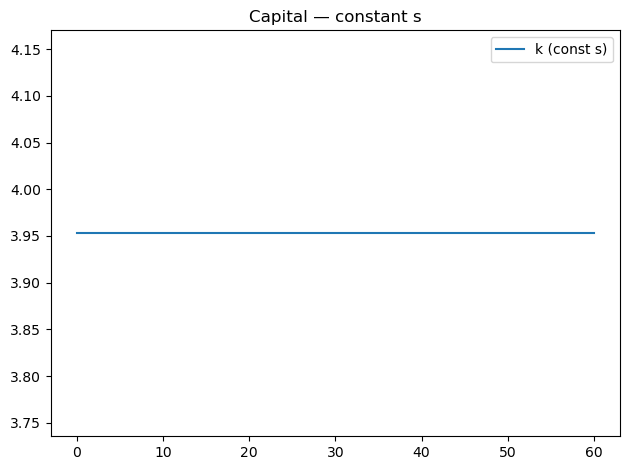

In [151]:
alpha, delta = 1/3, 0.08
s0 = 0.20

# correct order (there was an issue in the recorded version, where the inputs differed in the ordering): (alpha, s, delta)
k0 = k_star(alpha=alpha, s=s0, delta=delta) 

res_const = simulate_solow(k0=k0, T=60, alpha=alpha, s=s0, delta=delta)
# plot per-worker capital (same as K here)
plot_series({"k (const s)": res_const["k"]}, "Capital — constant s")


***Application 2: A temporary increase in the savings rate***

We set the savings rate to 0.25 for five periods, then we revert it back to s0 and plot the consumption over time.


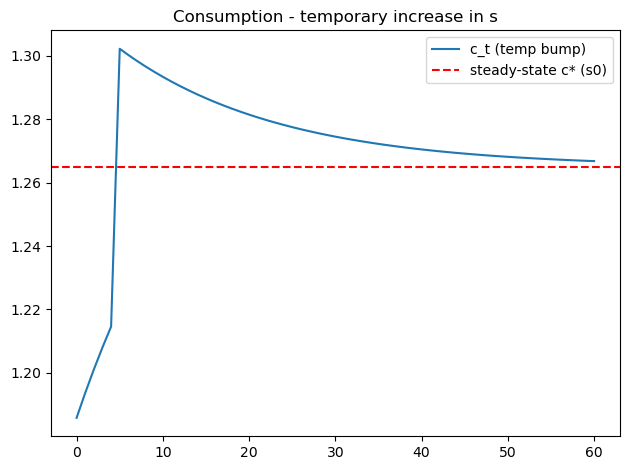

In [152]:
T = 60
# we build a temporary savings path, where we have a higher savings rate for the first 5 periods
s_path = np.array([0.25 if t < 5 else s0 for t in range(T+1)], dtype=float)
# then, we simulate the solow model with this path (note we can pass arrays directly)
res_temp = simulate_solow(k0, T=T, alpha=alpha, s=s_path , delta=delta)

# steady-state consumption at baseline s0
kss0 = (s0/delta)**(1/(1 - alpha))           # or k_star(alpha, delta, s0) if you defined it
css0 = (1 - s0) * kss0**alpha                # steady-state consumption at s0 (added in the plot)

# plot with dashed red steady-state line
plt.figure()
plt.plot(res_temp["c"], label="c_t (temp bump)")
plt.axhline(css0, linestyle="--", color="red", label="steady-state c* (s0)")
plt.title("Consumption - temporary increase in s")
plt.legend()
plt.tight_layout()
plt.show()



Note: I have corrected a small error in the code (compared to the recordings - it was the ordering of inputs).
_Interpretation:_ Consumption is initially depressed due to the increase of the savings rate for 5 periods, which leads to an increase in the capital stock, capital is now above its steady state value $k^*(s_0)$. When the savings rate goes back to 0 (from period 5 onwards), consumption first overshoots and then reverts back to its steady state.

***Application 3: A temporary increase in the depreciation rate***

We set the depreciation rate to 0.12 for five periods, then we revert it back to its initial value. We plot the path of capital per worker, consumption and deprecation over time.

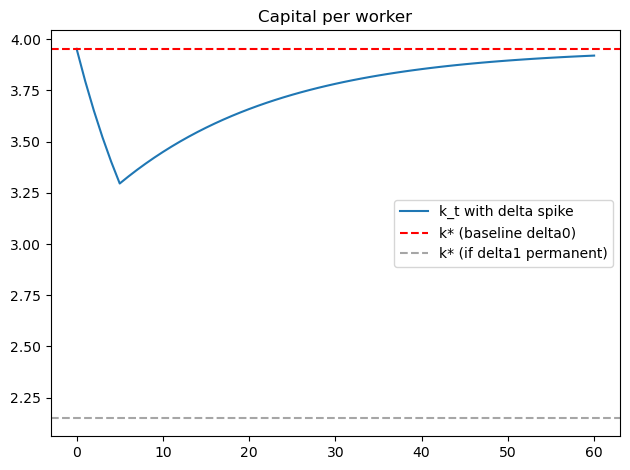

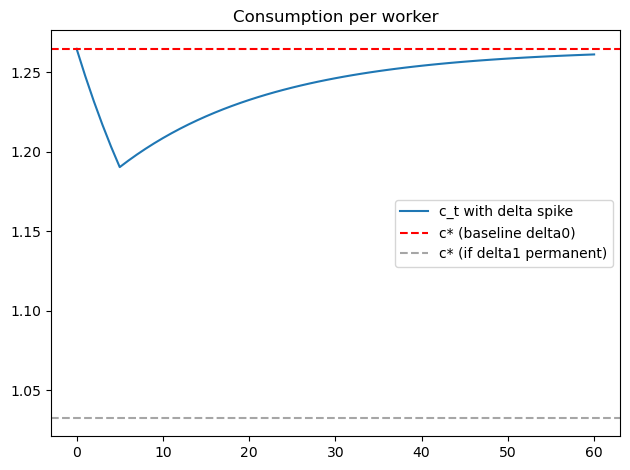

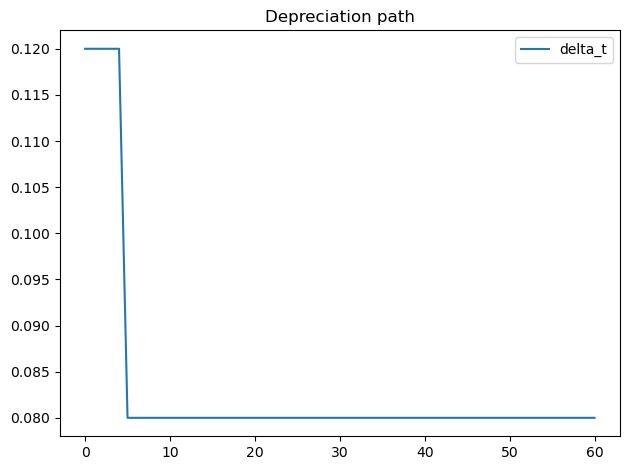

In [153]:
# Baseline parameters
alpha, s0, delta0 = 1/3, 0.20, 0.08
kss0 = k_star(alpha=alpha, s=s0, delta=delta0)
css0 = (1 - s0) * kss0**alpha

# Shock: delta rises to 0.12 for 5 periods, then reverts to 0.08
T = 60
delta1 = 0.12
delta_path = np.array([delta1 if t < 5 else delta0 for t in range(T+1)], dtype=float) # build a temporary delta path

# Simulate from baseline steady state with constant s
res = simulate_solow(k0=kss0, T=T, alpha=alpha, s=s0, delta=delta_path)

# (Counterfactual) steady state if delta were permanently = delta1
kss1 = k_star(alpha=alpha, s=s0, delta=delta1)
css1 = (1 - s0) * kss1**alpha

# Plots with baseline/counterfactual steady-state lines
plt.figure()
plt.plot(res["k"], label="k_t with delta spike")
plt.axhline(kss0, ls="--", color="red", label="k* (baseline delta0)")
plt.axhline(kss1, ls="--", color="gray", alpha=0.7, label="k* (if delta1 permanent)")
plt.title("Capital per worker"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure()
plt.plot(res["c"], label="c_t with delta spike")
plt.axhline(css0, ls="--", color="red", label="c* (baseline delta0)")
plt.axhline(css1, ls="--", color="gray", alpha=0.7, label="c* (if delta1 permanent)")
plt.title("Consumption per worker"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure()
plt.plot(res["delta_path"], label="delta_t")
plt.title("Depreciation path"); plt.legend(); plt.tight_layout(); plt.show()


### 6.1. <a id='toc6_1_'></a>[Extensions](#toc0_)

***1) Parameter Heatmap***

- See interactions fast: A heatmap shows how $k^*$ changes when both $s$ and $\delta$ move.
- Higher savings rate $s$ and lower deprecitation rate $\delta$ $\rightarrow$ higher $k^*$
- Good way to visualize sensitivity checks for parameters.


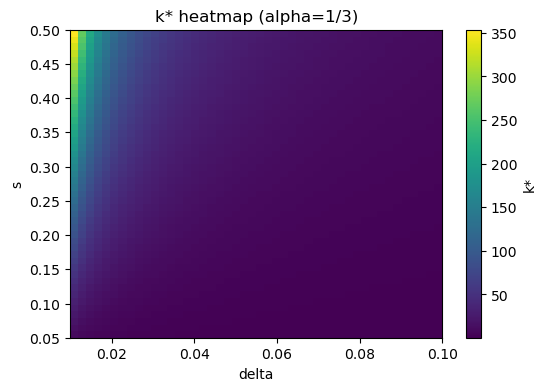

In [154]:
# === Heatmap of k* over (s, δ) ==============================================

# First, we build the grid for s and delta values, and an empty array to hold k* values
S = np.linspace(0.05, 0.5, 46) 
D = np.linspace(0.01, 0.1, 46)
KK = np.empty((len(S), len(D)))

# Fill the k* array by looping over all combinations of s and delta
for i, ss in enumerate(S):
    for j, dd in enumerate(D):
        KK[i,j] = k_star(alpha=1/3, s=ss, delta=dd) # her we store the steady-state capital level for each (s, delta) pair

# we plot the resutls
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(KK, origin='lower', aspect='auto', # imshow renders KK as colors; x-axis is δ, y-axis is s.
               extent=[D.min(), D.max(), S.min(), S.max()])
ax.set_xlabel('delta'); ax.set_ylabel('s')
ax.set_title('k* heatmap (alpha=1/3)')
fig.colorbar(im, ax=ax, label='k*')
plt.show()


***2) Permanent vs Transitory Shocks using  `simulate_solow`***

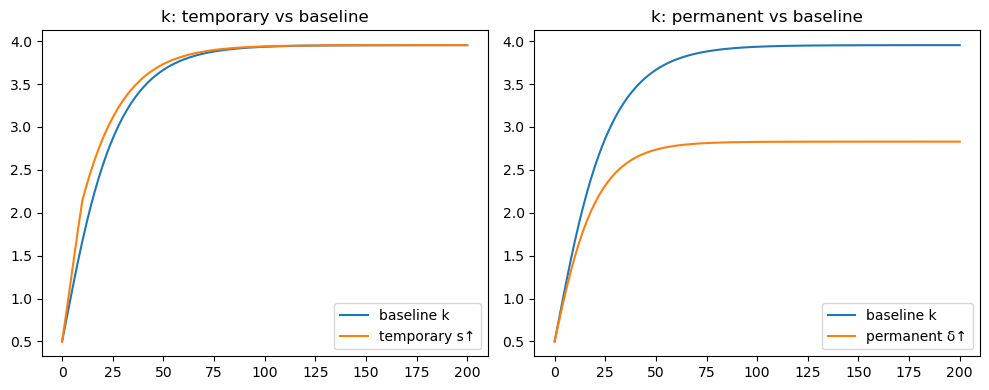

In [155]:
# --- helpers your simulate_solow expects ------------------------------------


# === Transition experiments (simulate_solow) ================================
T = 200
alpha = 1/3
s0, delta0 = 0.20, 0.08

# Baseline
base = simulate_solow(k0=0.5, T=T, alpha=alpha, s=s0, delta=delta0)

# (a) Temporary investment tax credit: s jumps +5pp for 10 periods
s_shock = np.array([0.25 if t < 10 else s0 for t in range(T+1)], dtype=float)
tmp = simulate_solow(k0=base["k"][0], T=T, alpha=alpha, s=s_shock, delta=delta0)

# (b) Permanent depreciation increase δ: +2pp from t=0 onward
delta_perm = np.full(T+1, 0.10, dtype=float)
perm = simulate_solow(k0=base["k"][0], T=T, alpha=alpha, s=s0, delta=delta_perm)

# --- plots -------------------------------------------------------------------
t = np.arange(T+1)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(t, base["k"], label="baseline k")
axs[0].plot(t, tmp["k"],  label="temporary s↑")
axs[0].set_title("k: temporary vs baseline")
axs[0].legend()

axs[1].plot(t, base["k"], label="baseline k")
axs[1].plot(t, perm["k"], label="permanent δ↑")
axs[1].set_title("k: permanent vs baseline")
axs[1].legend()

fig.tight_layout()
plt.show()


Questions? Socrative: "Progecon"

## 7. <a id='toc7_'></a>[Takeaways](#toc0_)

- **Modular model code + quick tests.** We wrote small, pure functions for the baseline Solow model (no growth) and added docstrings, input checks, and tiny "tests” so each piece can be reused.

- **Steady State and Transition Plots.** You have seen how to plot the steady state diagram and transition paths.

- **Interactive Dashboard.** We have set up an interactive dashboard that allows us to use sliders for a range of parameter values and values of initial capital.

- **Simulator for policy experiments.** We implemented a loop for $k_{t+1}=s\,f(k_t)+(1-δ)k_t$ that returns $(k_t,y_t,c_t)$, and structured inputs so parameters can be scalars, arrays, or callables, making it easy to run baseline vs. counterfactuals (e.g., a step change in $s$ or $δ$) and plot transitions.

